In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("diabetes dataset.csv")
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Preprocessing

In [5]:
print(f"DataSet have {raw_data.duplicated().sum()} duplicated records.\n")

for col in raw_data.columns:
    print(f"Column '{col}' have '{raw_data[col].isnull().sum()}' Null/NaN values.")

DataSet have 0 duplicated records.

Column 'Pregnancies' have '0' Null/NaN values.
Column 'Glucose' have '0' Null/NaN values.
Column 'BloodPressure' have '0' Null/NaN values.
Column 'SkinThickness' have '0' Null/NaN values.
Column 'Insulin' have '0' Null/NaN values.
Column 'BMI' have '0' Null/NaN values.
Column 'DiabetesPedigreeFunction' have '0' Null/NaN values.
Column 'Age' have '0' Null/NaN values.
Column 'Outcome' have '0' Null/NaN values.


### Missing Data 

In [6]:
''' Specifying the number of missing zero values in the dataset 
on all columns except ["Pregnancies", "Outcome"] '''

for col in raw_data.columns[1:len(raw_data.columns)-1]:
    tmp = raw_data[raw_data[col] == 0].shape[0]
    print(f"column '{col}' have '{tmp}' zero missing data.")

column 'Glucose' have '5' zero missing data.
column 'BloodPressure' have '35' zero missing data.
column 'SkinThickness' have '227' zero missing data.
column 'Insulin' have '374' zero missing data.
column 'BMI' have '11' zero missing data.
column 'DiabetesPedigreeFunction' have '0' zero missing data.
column 'Age' have '0' zero missing data.


In [7]:
# raw_data.drop(columns=["SkinThickness", "BloodPressure", "Insulin"], inplace=True)

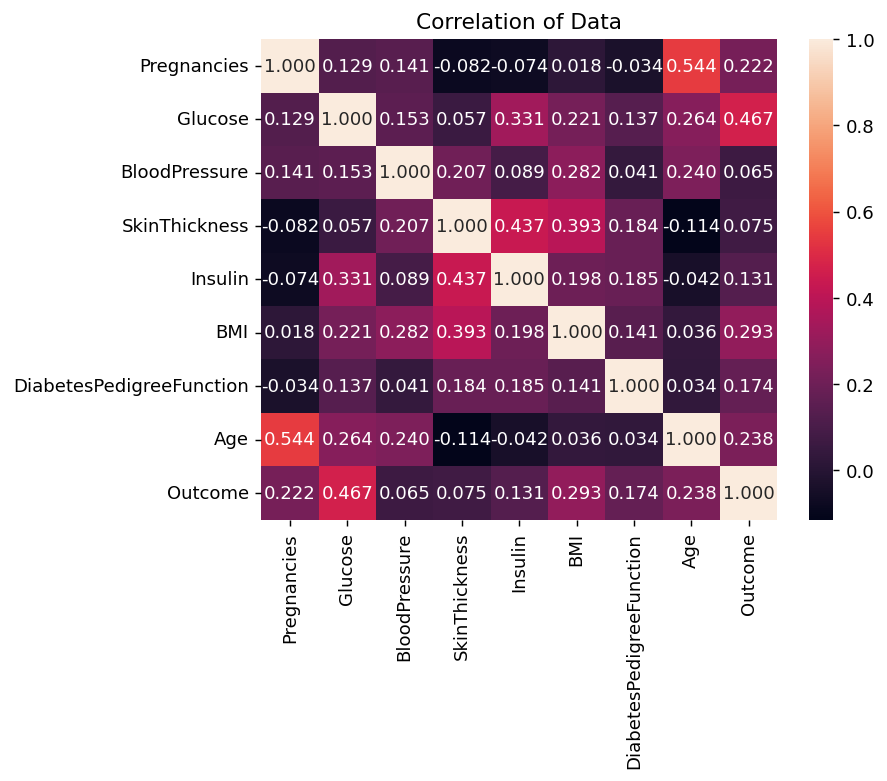

In [8]:
plt.figure(dpi=130)
sns.heatmap(raw_data.corr(), annot=True, fmt= '.3f')
plt.title("Correlation of Data")
plt.show()

In [9]:
corr = raw_data.corr()
corr['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [10]:
def boxplot_easy(df):
    fig, axs = plt.subplots(df.columns.size, 1, dpi=95, figsize=(7,15))
    i = 0
    for col in df.columns:
        axs[i].boxplot(df[col], vert=False)
        axs[i].set_ylabel(col)
        i+=1
    plt.show()

In [11]:
''' Because of low correlation between Insulin and SkinThickness with Outcome column, 
    we can drop Insulin and SkinThickness columns '''

# raw_data.drop(columns=["Insulin", "SkinThickness"], inplace=True)


raw_data = raw_data.where(raw_data["Insulin"] > 0)
raw_data = raw_data.where(raw_data["SkinThickness"] > 0)
raw_data = raw_data.where(raw_data["BloodPressure"] > 0)
raw_data = raw_data.where(raw_data["Glucose"] > 0)
raw_data = raw_data.where(raw_data["BMI"] > 0)

raw_data.dropna(inplace=True)
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0
...,...,...,...,...,...,...,...,...,...
753,0.0,181.0,88.0,44.0,510.0,43.3,0.222,26.0,1.0
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1.0
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0


### Visualization Data 

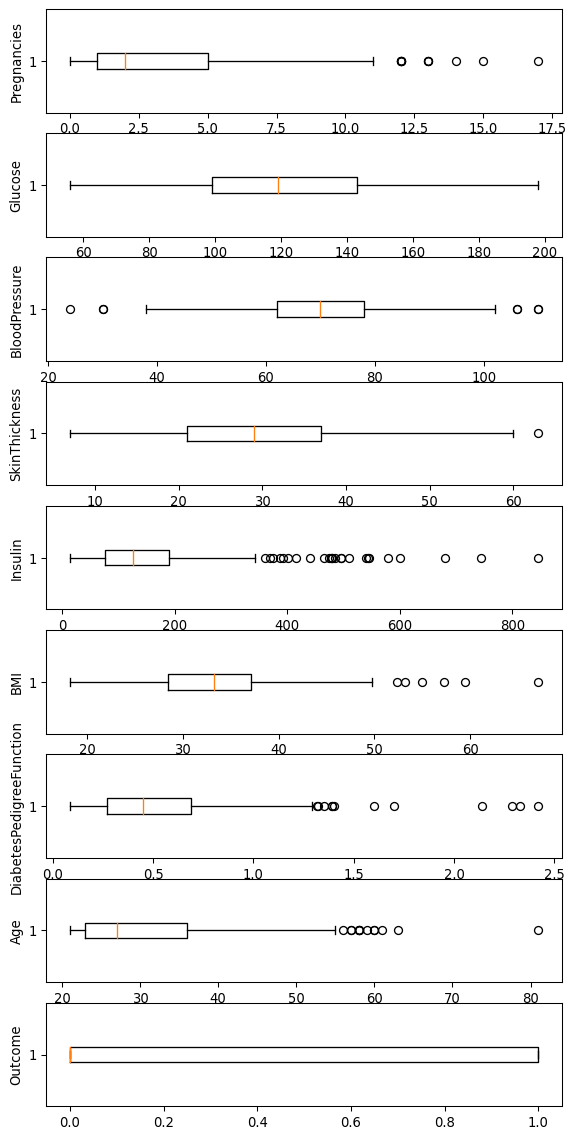

In [12]:
''' Boxplot shows outliers data in each columns. We can drop outliers from our data'''

boxplot_easy(raw_data)

C:\Users\armin\AppData\Local\Temp\ipykernel_4516\3887393980.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outlier = no_outlier[(raw_data[col] >= lower_bound) & (raw_data[col] <= upper_bound)]


(329, 9)


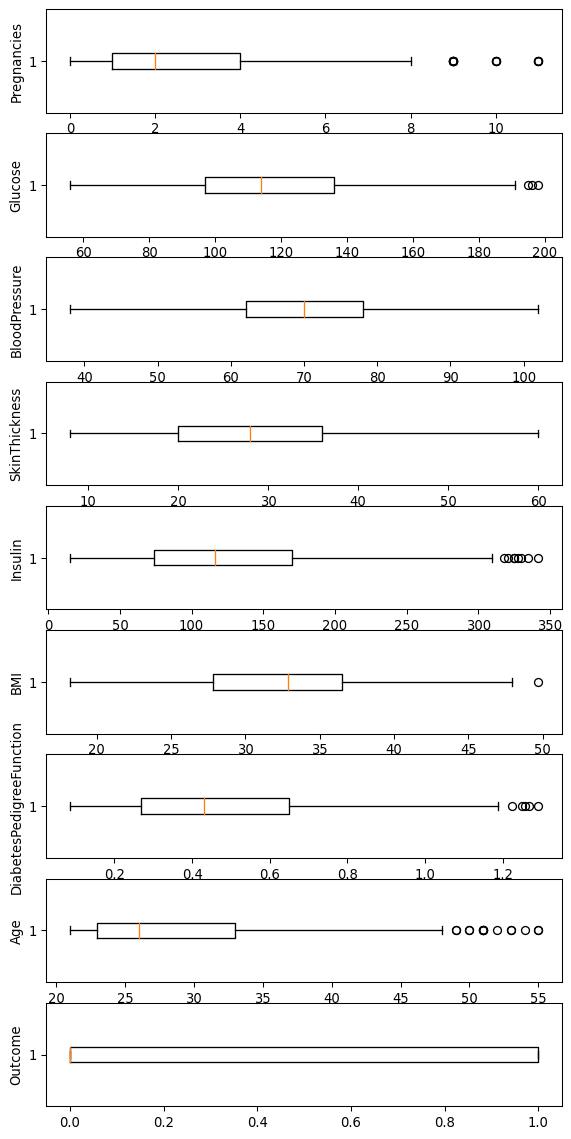

In [13]:
no_outlier = raw_data

for col in raw_data.columns:
    mean = raw_data[col].mean()
    std = raw_data[col].std()
    

    Q1 = raw_data[col].quantile(0.25)
    Q3 = raw_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
#     lower_bound = mean - std*2
#     upper_bound = mean + std*2
    
#     print('Lower Bound :',lower_bound)
#     print('Upper Bound :',upper_bound)
    
    no_outlier = no_outlier[(raw_data[col] >= lower_bound) & (raw_data[col] <= upper_bound)]

print(no_outlier.shape)

boxplot_easy(no_outlier)

In [14]:
# sns.pairplot(raw_data)
# plt.show()

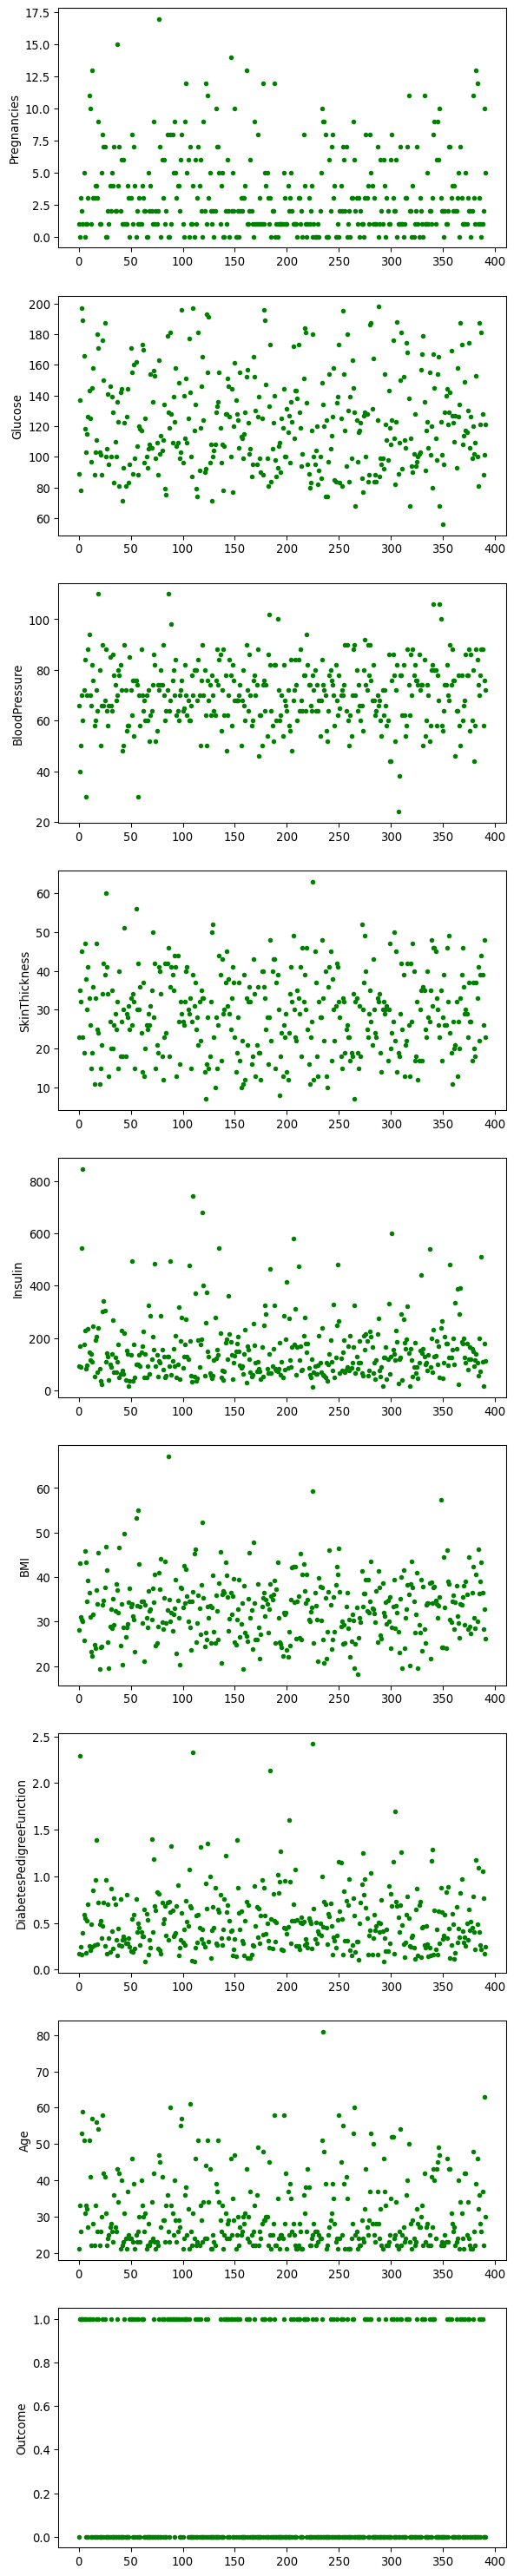

In [15]:
fig, axs = plt.subplots(9, 1, dpi=95, figsize=(7,40))
i = 0
for col in raw_data.columns:
    axs[i].scatter(x=range(len(raw_data[col])), y=raw_data[col], color="green", s=10)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

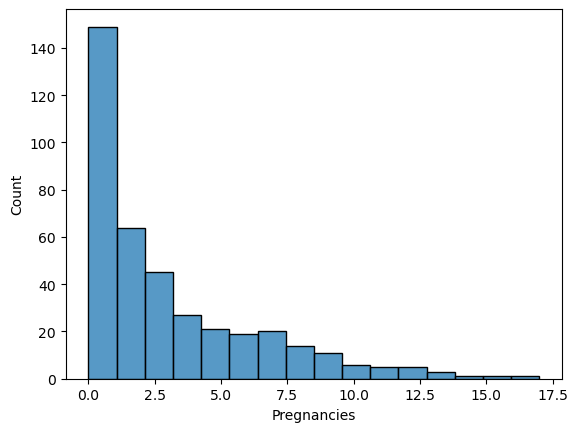

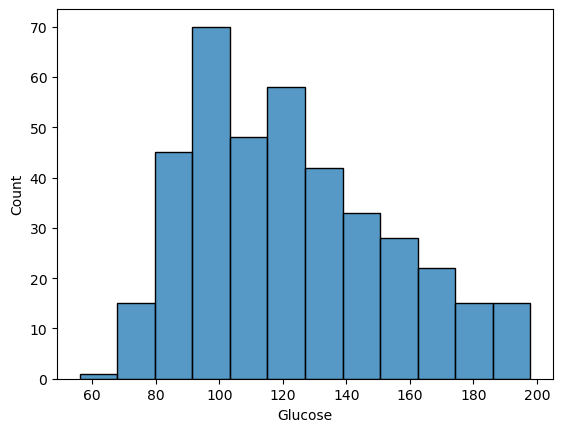

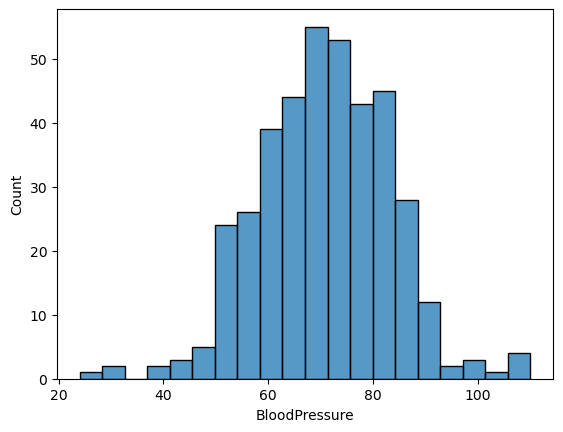

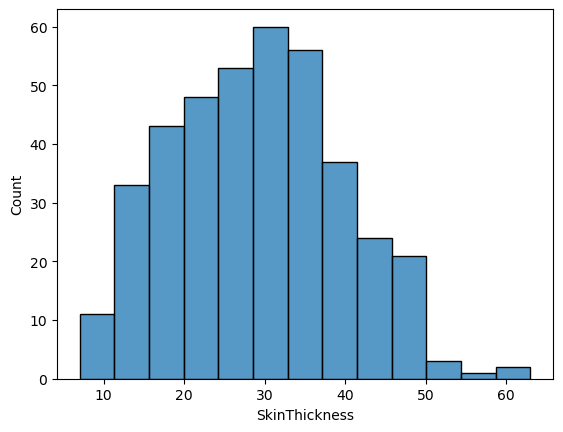

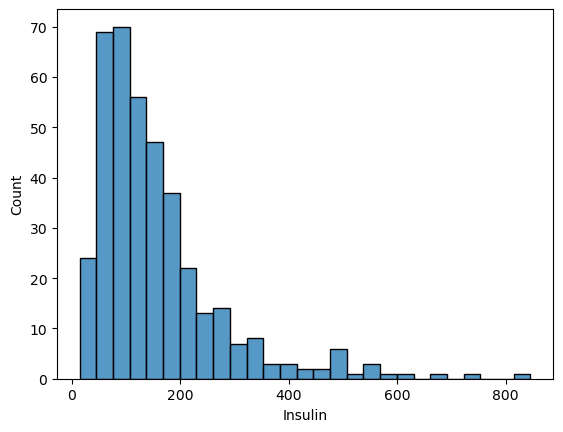

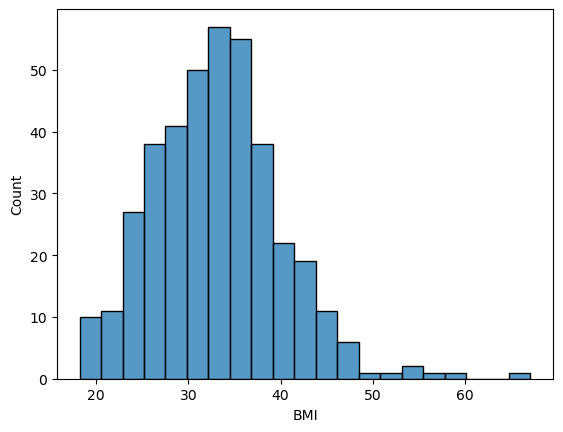

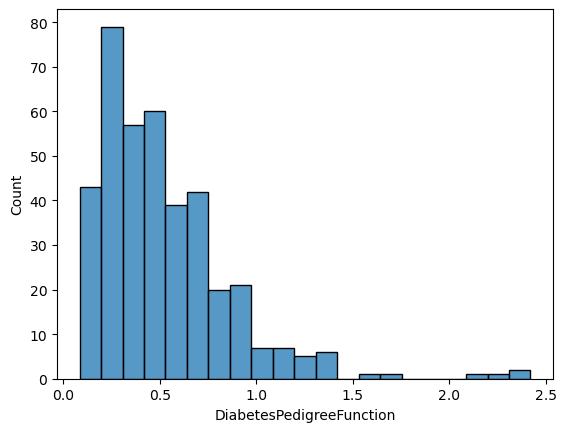

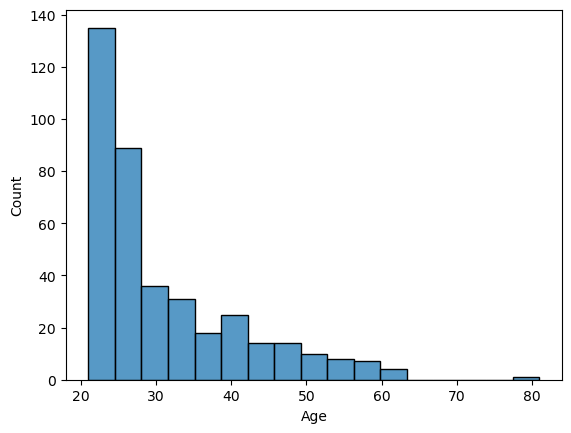

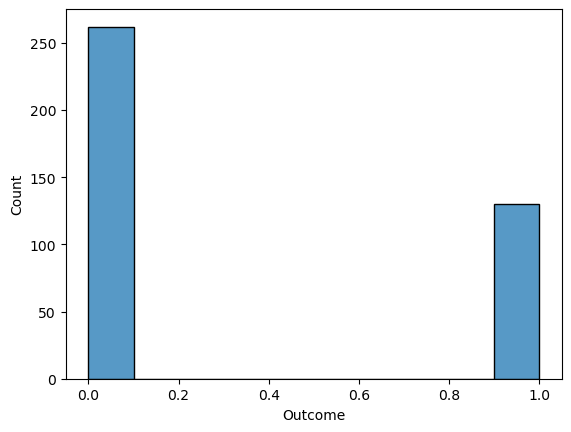

In [16]:
for col in raw_data.columns:
    sns.histplot(x=raw_data[col])
    plt.show()

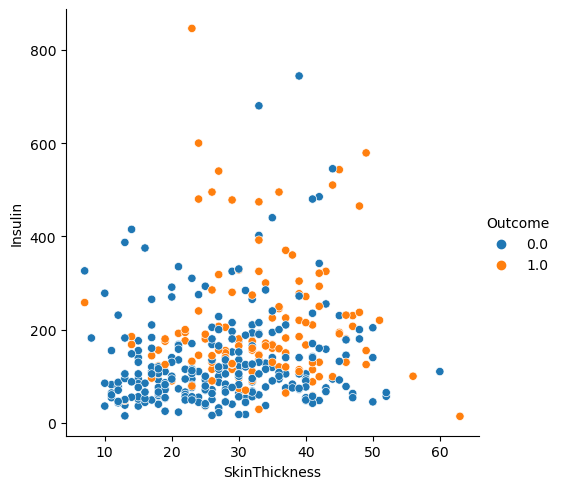

In [17]:
sns.relplot(
    data=raw_data,
    x="SkinThickness", y="Insulin", hue="Outcome"
)
plot.show()

# Select Model

In [18]:
X_Data = no_outlier.drop(columns=["Outcome"])
Y_Data = no_outlier["Outcome"]
# X_Data,Y_Data

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, jaccard_score

# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X_Data)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y_Data, test_size=0.3, random_state=0)
# x_train, x_test, y_train, y_test

In [21]:
# collect models accuracy, to find the maximum accuracy
acc = {}

### Logistic Regression 

In [22]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, solver="liblinear")
LR.fit(x_train, y_train)
y_predict_LR = LR.predict(x_test)

accuracy = accuracy_score(y_test, y_predict_LR)
acc.update({'LogisticRegression': accuracy})
print(classification_report(y_test, y_predict_LR))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        76
         1.0       0.65      0.65      0.65        23

    accuracy                           0.84        99
   macro avg       0.77      0.77      0.77        99
weighted avg       0.84      0.84      0.84        99



### Decision Trees

In [23]:
from sklearn.tree import DecisionTreeClassifier
for cri in ["gini", "entropy"]:
    # DT = DecisionTreeClassifier(criterion="gini", max_depth = 4)
    DT = DecisionTreeClassifier(criterion=cri)
    
    DT.fit(x_train, y_train)
    y_predict_DT = DT.predict(x_test)
    
    print("DecisionTrees criterion: ", cri)
    accuracy = accuracy_score(y_test, y_predict_DT)
    acc.update({f'DecisionTrees {cri}': accuracy})
    print(classification_report(y_test, y_predict_DT))

DecisionTrees criterion:  gini
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86        76
         1.0       0.55      0.52      0.53        23

    accuracy                           0.79        99
   macro avg       0.70      0.70      0.70        99
weighted avg       0.78      0.79      0.79        99

DecisionTrees criterion:  entropy
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        76
         1.0       0.43      0.43      0.43        23

    accuracy                           0.74        99
   macro avg       0.63      0.63      0.63        99
weighted avg       0.74      0.74      0.74        99



### SVM

In [24]:
from sklearn import svm

for kern in ["sigmoid", 'poly', 'linear', 'rbf']:
    SVM = svm.SVC(kernel=kern)

    SVM.fit(x_train, y_train) 
    y_predict_SVM = SVM.predict(x_test)

    print("SVM Kernel: ", kern)
    accuracy = accuracy_score(y_test, y_predict_SVM)
    acc.update({f'SVM {kern}': accuracy})

    print(classification_report(y_test, y_predict_SVM))

SVM Kernel:  sigmoid
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        76
         1.0       0.56      0.61      0.58        23

    accuracy                           0.80        99
   macro avg       0.72      0.73      0.73        99
weighted avg       0.80      0.80      0.80        99

SVM Kernel:  poly
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        76
         1.0       0.71      0.52      0.60        23

    accuracy                           0.84        99
   macro avg       0.79      0.73      0.75        99
weighted avg       0.83      0.84      0.83        99

SVM Kernel:  linear
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90        76
         1.0       0.68      0.65      0.67        23

    accuracy                           0.85        99
   macro avg       0.79      0.78      0.78        99
weighted avg   

### KNeighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,15):
    KN = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
    y_predict_KN = KN.predict(x_test)
    print(f"K : {k}")
    print(classification_report(y_test, y_predict_KN))
    accuracy = accuracy_score(y_test, y_predict_KN)
    acc.update({f'KNeighbors {k}': accuracy})

K : 1
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82        76
         1.0       0.43      0.52      0.47        23

    accuracy                           0.73        99
   macro avg       0.64      0.66      0.64        99
weighted avg       0.75      0.73      0.74        99

K : 2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87        76
         1.0       0.58      0.30      0.40        23

    accuracy                           0.79        99
   macro avg       0.70      0.62      0.64        99
weighted avg       0.76      0.79      0.76        99

K : 3
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89        76
         1.0       0.64      0.61      0.62        23

    accuracy                           0.83        99
   macro avg       0.76      0.75      0.76        99
weighted avg       0.83      0.83      0.83        99

K : 4
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87        76
         1.0       0.59      0.43      0.50        23

    accuracy                           0.80        99
   macro avg       0.71      0.67      0.69        99
weighted avg       0.78      0.80      0.79        99

K : 5
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87        76
         1.0       0.58      0.65      0.61        23

    accuracy                           0.81        99
   macro avg       0.73      0.75      0.74        99
weighted avg       0.82      0.81      0.81        99

K : 8
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88        76
         1.0       0.62      0.57      0.59        23

    accuracy                           0.82        99
   macro avg       0.75      0.73      0.74        99
weighted avg       0.81      0.82      0.82        99

K : 9
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        76
         1.0       0.65      0.65      0.65        23

    accuracy                           0.84        99
   macro avg       0.77      0.77      0.77        99
weighted avg       0.84      0.84      0.84        99

K : 10


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

K : 13
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89        76
         1.0       0.67      0.52      0.59        23

    accuracy                           0.83        99
   macro avg       0.77      0.72      0.74        99
weighted avg       0.82      0.83      0.82        99

K : 14
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90        76
         1.0       0.73      0.48      0.58        23

    accuracy                           0.84        99
   macro avg       0.80      0.71      0.74        99
weighted avg       0.83      0.84      0.83        99



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

for depth in range(1,11):
    RFC = RandomForestClassifier(random_state=0, max_depth=depth)
    RFC.fit(x_train, y_train)
    y_predict_RFC = RFC.predict(x_test)

    print(f"K: {depth}")
    print(classification_report(y_test, y_predict_RFC))
    accuracy = accuracy_score(y_test, y_predict_RFC)
    acc.update({f'RandomForest {depth}': accuracy})

K: 1
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        76
         1.0       1.00      0.26      0.41        23

    accuracy                           0.83        99
   macro avg       0.91      0.63      0.66        99
weighted avg       0.86      0.83      0.79        99

K: 2
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92        76
         1.0       0.86      0.52      0.65        23

    accuracy                           0.87        99
   macro avg       0.86      0.75      0.78        99
weighted avg       0.87      0.87      0.86        99

K: 3
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92        76
         1.0       0.81      0.57      0.67        23

    accuracy                           0.87        99
   macro avg       0.85      0.76      0.79        99
weighted avg       0.86      0.87      0.86        99

K: 4

In [27]:
from sklearn.linear_model import SGDClassifier

for loss in ['hinge', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']:
    SGD = SGDClassifier(loss=loss, alpha=0.01, shuffle=True)
    SGD.fit(x_train, y_train)
    y_predict_SGD = SGD.predict(x_test)

    print(f"loss function: {loss}")
    print(classification_report(y_test, y_predict_SGD))
    accuracy = accuracy_score(y_test, y_predict_SGD)
    acc.update({f'SGD {loss} function': accuracy})

loss function: hinge
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89        76
         1.0       0.64      0.70      0.67        23

    accuracy                           0.84        99
   macro avg       0.77      0.79      0.78        99
weighted avg       0.84      0.84      0.84        99

loss function: modified_huber
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        76
         1.0       0.76      0.70      0.73        23

    accuracy                           0.88        99
   macro avg       0.84      0.81      0.82        99
weighted avg       0.88      0.88      0.88        99

loss function: squared_hinge
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        76
         1.0       0.65      0.65      0.65        23

    accuracy                           0.84        99
   macro avg       0.77      0.77      0.77     

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_predict_GNB = GNB.predict(x_test)

print(classification_report(y_test, y_predict_GNB))
accuracy = accuracy_score(y_test, y_predict_GNB)
acc.update({f'GNB ': accuracy})

              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84        76
         1.0       0.51      0.78      0.62        23

    accuracy                           0.78        99
   macro avg       0.72      0.78      0.73        99
weighted avg       0.83      0.78      0.79        99



## Evaluation Model 

In [44]:
acc

{'LogisticRegression': 0.8383838383838383,
 'DecisionTrees gini': 0.7878787878787878,
 'DecisionTrees entropy': 0.7373737373737373,
 'SVM sigmoid': 0.797979797979798,
 'SVM poly': 0.8383838383838383,
 'SVM linear': 0.8484848484848485,
 'SVM rbf': 0.8181818181818182,
 'KNeighbors 1': 0.7272727272727273,
 'KNeighbors 2': 0.7878787878787878,
 'KNeighbors 3': 0.8282828282828283,
 'KNeighbors 4': 0.797979797979798,
 'KNeighbors 5': 0.8383838383838383,
 'KNeighbors 6': 0.8181818181818182,
 'KNeighbors 7': 0.8080808080808081,
 'KNeighbors 8': 0.8181818181818182,
 'KNeighbors 9': 0.8383838383838383,
 'KNeighbors 10': 0.797979797979798,
 'KNeighbors 11': 0.7878787878787878,
 'KNeighbors 12': 0.8282828282828283,
 'KNeighbors 13': 0.8282828282828283,
 'KNeighbors 14': 0.8383838383838383,
 'RandomForest 1': 0.8282828282828283,
 'RandomForest 2': 0.8686868686868687,
 'RandomForest 3': 0.8686868686868687,
 'RandomForest 4': 0.8686868686868687,
 'RandomForest 5': 0.8181818181818182,
 'RandomForest 6'

In [45]:
MAX_ACCURACY = [0, ""]
for _key, _acc in acc.items():
    if _acc >= MAX_ACCURACY[0]:
        MAX_ACCURACY = [_acc, _key]
        
print(f"Model {MAX_ACCURACY[1]} have best accuracy in other models with {MAX_ACCURACY[0]* 100} accuracy")
# MAX_ACCURACY

Model SGD huber function have best accuracy in other models with 87.87878787878788 accuracy
